# Homework 2 – SHapley Additive exPlanations (SHAP).

Dataset used for experiments with explanation libraries is Heart Attack Dataset. Most of the experiments are run using XGBClassifier, except the last one where Logistic Regression is used. Provided experiments gave some inside in importance of different features in the final prediction.

## Data information

Let's begin with reading csv containing heart attack data and print the head of it, to verify it's content. Dataset should contain following columns:

+ Age : Age of the patient

+ Sex : Sex of the patient

+ exang: exercise induced angina (1 = yes; 0 = no)

+ ca: number of major vessels (0-3)

+ cp : Chest Pain type chest pain type

    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
    + Value 4: asymptomatic
+ trtbps : resting blood pressure (in mm Hg)

+ chol : cholestoral in mg/dl fetched via BMI sensor

+ fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

+ rest_ecg : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
+ thalach : maximum heart rate achieved

+ target : 0= less chance of heart attack 1= more chance of heart attack

# Task A

## A.4 + A.5

Shown below results, correspond to all of A.4, A.5 and A.6 tasks.

### A.4
Data for two different patients was sampled from the dataset. For each of the patients, the analysis was made to verify which features are the most important.
Apparently for the first one the most important was 'sex' and for the second one 'thall'. Unfortunately, there is no information what 'thall' corresponds to, there are multiple differences between data description and actual dataset columns so no exact verification of accuracy of such use can be done. However, for patient 0, 'sex' overcome 3 times any other feature. That's not always the case.

After all, for both patients both features were similarly important to determine the heart attack probability. It was not the pattern among the rest of the patients. Many different features were marked as the most important depending on the patient.

### A.5
On chosen example some interesting observation can be done also. Age feature, for one patient has positive attribution and for the other negative. Age feature alone does not have that much impact but still is pretty important for the prediction model. It is against intuition but slightly lower age (considering age around 50) implies higher chance for heart attack.
Age, for those examples, does not have much impact, but it fits the expectations of the task.

![alt text](imgs/a4.png "Title")


## A.6
Between results from two different packages (dalex and shap) there are some differences.

For the first patient, 'cp_3' value is much higher for the shap than in dalex. But there is no much more differences.
For the second patient all top results are similar. For some cases (not shown here) there are even exactly the same.

In general, it is possible to observe minor differences between two packages. However, those differences are not that drastic.

![alt text](imgs/a3_shap.png "Title")

![alt text](imgs/a3_shap2.png "Title")

## A.7
Below are presented results of analysis using dalex on Logistic Regression.

As well as for XGBClassifier data was not normalized for better comparison of the results.

As it was expected after recognizing differences between results from two different packages for the same model, training different model and using dalex for analysis on both, also introduced different results. There is some similarity, such as 'sex' value for the second patient. However, most of the results are not exactly the same. Different models use different features to make correct predictions.

Normalizing data for LR did not improve results but made it more difficult to interpret.

![alt text](imgs/a72.png "Title")


Concluding - there are some features that are unanimously considered important such as sex, certain cp values, age or thall despite the chosen model or explanation method. However, those results are not completely identical.

# Task B

## Solution

![alt text](imgs/b.png "Title")

# Appendix

In [ ]:
!pip install pandas
!pip install plotly
!pip install seaborn
!pip install sklearn
!pip install xgboost
!pip install imblearn
!pip install dalex
!pip install shap

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import dalex as dx
import shap

In [14]:
df = pd.read_csv('data/heart.csv')
categorical_cols = ['exng', 'caa', 'cp', 'restecg']

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
df[categorical_cols] = df[categorical_cols].astype('category')
df_tr = df.copy()

ohe.fit(df_tr[categorical_cols])
df_tr[ohe.get_feature_names_out(categorical_cols)] = ohe.transform(df_tr[categorical_cols])
df_tr.drop(columns=categorical_cols, inplace=True)

X, y = df_tr.drop(columns=['output']), df_tr['output']

In [15]:
def run_training(model, run_cv: bool = False):
    if run_cv:
        print(f'CV mean accuracy: {cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()}')

    model.fit(X, y)
    y_pred = model.predict(X)
    conf_mat = confusion_matrix(y, y_pred)
    cmd = ConfusionMatrixDisplay(conf_mat)
    cmd.plot()
    print(classification_report(y, y_pred))

## A.1
Selected model for further experiments is XGBClassifier.

In [16]:
model1 = XGBClassifier()
model1.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## A.2
Sampling two patients.

In [24]:
patients = X.iloc[[14, 108]]#.sample(2) #14, 108
print(patients.index)
model1.predict_proba(patients)

Int64Index([14, 108], dtype='int64')


array([[8.0226064e-03, 9.9197739e-01],
       [4.6610832e-04, 9.9953389e-01]], dtype=float32)

## A.3
Variable attributions, using SHAP. Used libraries are dalex and shap.

In [25]:
explainer = dx.Explainer(model1, X, y, predict_function=lambda model, x: model.predict(x), label="XGBClassifier")
explainer.predict(patients)

Preparation of a new explainer is initiated

  -> data              : 303 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBClassifier
  -> predict function  : <function <lambda> at 0x7f46d51b1630> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.545, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 0.0, max = 0.0
  -> model_info        : package xgboost

A new explainer has been created!


array([1, 1])

## A.3 + A.4 + A.5
Results presented in all A3, A4 and A5 tasks. Corresponding plots are created with dalex and shap.

In [26]:
shap_attributions = [explainer.predict_parts(patients.iloc[[i]], type="shap", label=f'patient {i}') for i in range(patients.shape[0])]
shap_attributions[0].plot(shap_attributions[1::])

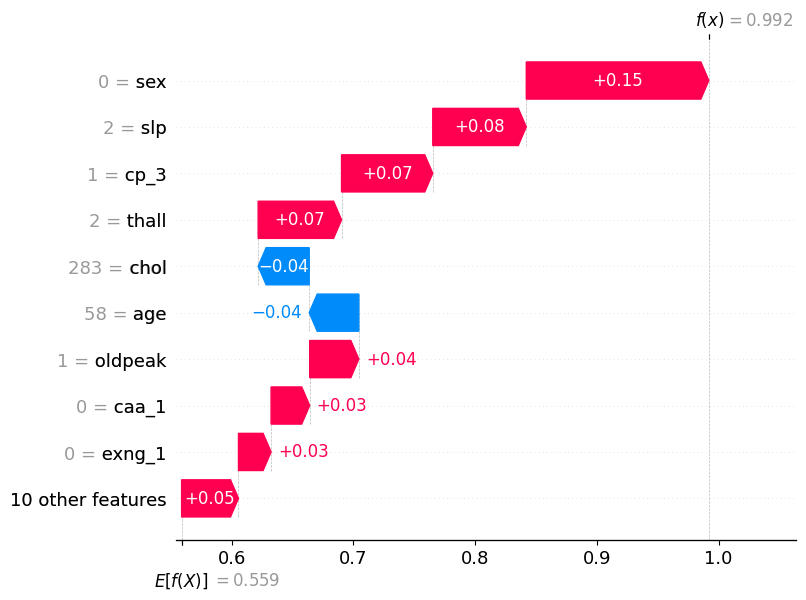

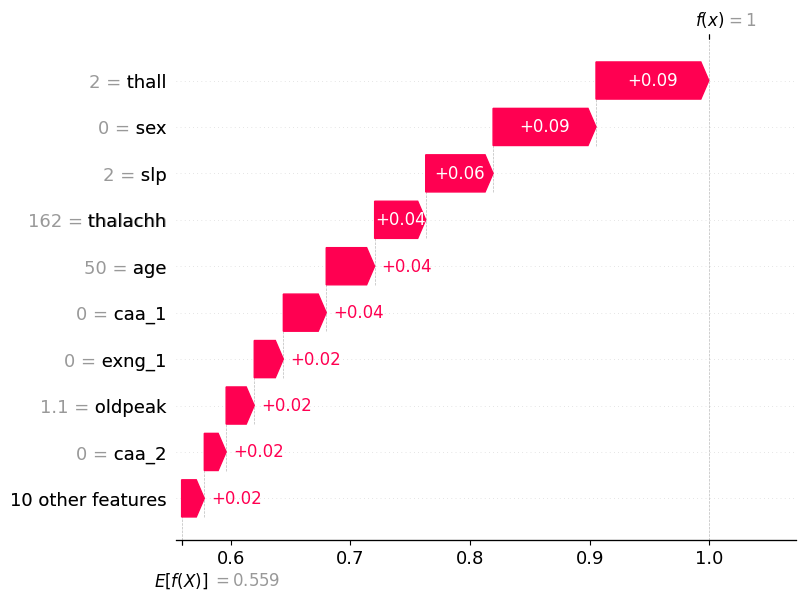

In [27]:
shap_explainer = shap.explainers.Tree(model1, data=X, model_output="probability")
shap_values = shap_explainer(patients)
for i in range(patients.shape[0]):
    shap.plots.waterfall(shap_values[i])

## A.7
Choosing Logistic Regression as an alternative to XGBClassifier. Plots using dalex are created for further comparison.

In [37]:
sc = StandardScaler()
model2 = LogisticRegression(max_iter=1000, random_state=0)
model2.fit(X, y)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
explainer2 = dx.Explainer(model2, X, y, predict_function=lambda model, df: model.predict_proba(df)[:, 1], label="LogisticRegression")
explainer2.predict(patients)

shap_attributions2 = [explainer2.predict_parts(patients.iloc[[i]], type="shap", label=f'patient {i}') for i in range(patients.shape[0])]
print(shap_attributions2)
shap_attributions2[0].plot(shap_attributions2[1::])